xrandr --output HDMI-1 --auto


# KaggleのTitanicをやり始めるまでの話

### Kaggle
データ分析コンペのプラットフォーム
### Titanic
Kaggleのチュートリアル的なコンペ

## 技術書典で本を買いました
* PythonによるKaggleのチュートリアル

![](./py_kaggle.jpg)

 ## ところで・・・
 最近Juliaという言語が気になってます。

## ということで
KaggleとJuliaに同時に入門しました。

## 目次
1. Juliaとは
1. 環境
1. Kaggleとは
1. Titanicとは
1. Titanicを解いてみる

# Juliaとは

## Julia言語の特徴
* 速い
* Python資産を利用可能
* データの可視化が容易

In [22]:
print("Hello　World")

Hello　World

## どのぐらい速いか
fib(n)をPython, R, Juliaで比較してみた  
[Python](http://localhost:8888/notebooks/work/fib_py.ipynb)
```Python
def fib(n):
    return 1 if n<=1 else fib(n-2) + fib(n-1)
```

[R](http://localhost:8888/notebooks/work/fib_r.ipynb)
```R
fib <- function(n)ifelse(n<=1,1,fib(n-2)+fib(n-1))
```

[Julia](http://localhost:8888/notebooks/work/fib_jl.ipynb)
```Julia
fib(n) = n<=1 ? 1 : fib(n-2)+fib(n-1)
```


## 結果

In [1]:
using CSV
using Plots
using GR
gr()

Plots.GRBackend()

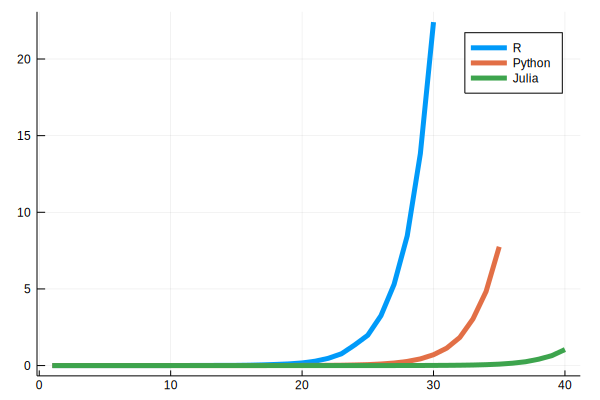

In [2]:
score = CSV.read("./fib_score.csv")
Plots.plot([score.R[1:30],score.Python[1:35],score.Julia[1:40]],label=["R" "Python" "Julia"],lw=5)

## Pythonライブラリの利用方法
* PyCallを利用

In [4]:
using Plots
using GR
gr()

Plots.GRBackend()

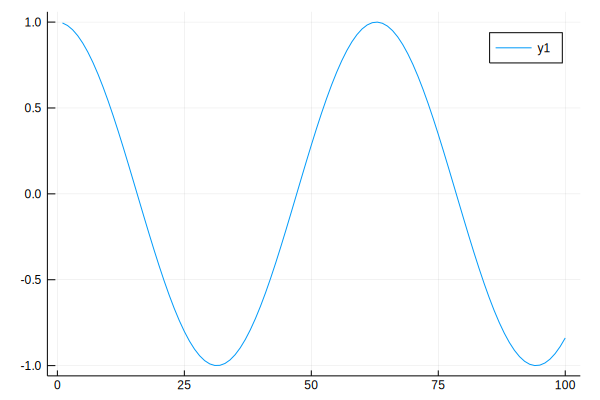

In [3]:
using PyCall
@pyimport math
Plots.plot(math.cos.((1:100)/10))

## 簡単にデータを可視化できる

In [6]:
using Plots
using GR
gr()

Plots.GRBackend()

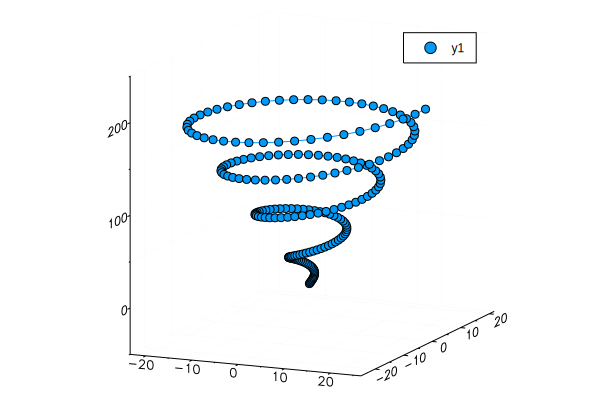

In [4]:
N = 200
d = 8π/N
x = [d*n*cos(d*n) for n in 0:N]
y = [d*n*sin(d*n) for n in 0:N]
z = 0.0:N
Plots.plot(x,y,z,marker=:circle)

## こんなこともできる

In [5]:
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end
function step!(l::Lorenz)
    dx = l.σ*(l.y - l.x)       ; l.x += l.dt * dx
    dy = l.x*(l.ρ - l.z) - l.y ; l.y += l.dt * dy
    dz = l.x*l.y - l.β*l.z     ; l.z += l.dt * dz
end
attractor = Lorenz((dt = 0.02, σ = 10., ρ = 28., β = 8//3, x = 1., y = 1., z = 1.)...)
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/tmp.gif
└ @ Plots /opt/julia/packages/Plots/qh1wV/src/animation.jl:90


Plots.AnimatedGif("/home/jovyan/work/tmp.gif")

# 環境

## 環境
* JupyterNotebook(Docker)
* RISE

## 1.Dockerfile作成
JupyterNotebookでRISEを使うためにDockerfileを作成
```yml
FROM jupyter/datascience-notebook
RUN pip install RISE 
RUN jupyter-nbextension install rise --py --sys-prefix
RUN jupyter-nbextension enable rise --py --sys-prefix
EXPOSE 8888
```

## 2.docker-compose.yml作成
ライブラリがインストールされるディレクトリはホストにマウント。
```
version:  '3'
services:
  datascience-notebook:
      image: myjupyter
      volumes:
        - ./data/work:/home/jovyan/work
        - ./data/notebook:/etc/ssl/notebook
        - ./data/julia_module:/opt/julia
      ports:
        - 8888:8888
      container_name:   jupyter_notebook
      command: "start-notebook.sh \
        --NotebookApp.password='sha1:f09a03d5998b:7366bffeb720c8e67e821b9e1fbb0a754f1e4476'"
```


## 3.起動
```shell
docker-compose up
```

## 4.ライブラリ導入
jupyternotebookの機能からTerminalにアクセス可能。  
そこから導入すればOK

# Kaggleとは

## Kaggleとは
* データ分析コンペのプラットフォーム
* 企業がデータを提供する
* 誰が最も正確な予測ができるか競う
* 賞金あり

![](./kaggle.png)

## 参加したいコンペを選択して参加
![](./kaggle2.png)

## コンペに関して多数のDiscussionが開かれます
![](./kaggle_discussion.png)

## 人のコードが見れます
![](./kaggle_code.png)

# Titanicとは

## Titanicとは
* Kaggleのチュートリアル的な問題
* Titanic乗客の生死を予測する

## Titanicの詳細
次の２つのデータが提供される
* train.csv
* test.csv

### train.csv
891人分の乗客情報と生死のペア

In [6]:
using CSV
titanic=CSV.read("./train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,Float64⍰,Int64⍰,Int64⍰,String⍰,Float64⍰,String⍰,String⍰
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


### test.csv
418人分の乗客情報（生死を除く）  
この418人の生死を予測し、その制度を競う

In [7]:
using CSV
test=CSV.read("./test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64⍰,Int64⍰,String⍰,String⍰,Float64⍰,Int64⍰,Int64⍰,String⍰,Float64⍰,String⍰,String⍰
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,missing,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,missing,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,missing,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,missing,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,missing,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,missing,S
7,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,missing,Q
8,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0,missing,S
9,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,missing,C


## 乗客情報(CSVのカラム)
* PassengerId : ID
* Survived : 生死
* Pclass : チケットクラス
* Name : 名前
* Sex : 性別
* Age : 年齢
* SibSp : 同乗した兄弟または配偶者の人数
* Parch : 同乗した親または子供の人数
* Ticket : チケット番号
* Fare : 運賃
* Cabin : キャビン番号
* Embarked : 乗船港

# Titanicを解いてみる

# まずは軽く分析...
## とりあえず平均生存率

In [8]:
using CSV
titanic = CSV.read("./train.csv")
function survive_rate(x)
    dead = sum(x .== 0)
    alive = sum(x .== 1)
    return alive/(dead + alive)
end
survive_rate(titanic.Survived)

0.3838383838383838

## 38%

## 性別
救命ボートには女性が優先的に乗ったことは有名な話。  
男女別で生存率を分析してみる。

In [9]:
using CSV
titanic = CSV.read("./train.csv")
function survive_rate(x)
    dead = sum(x .== 0)
    alive = sum(x .== 1)
    return alive/(dead + alive)
end
    
CSV.by(titanic,:Sex,:Survived=>sum,:Survived=>x->sum(x.==0),:Survived => survive_rate)

,Sex,Survived_sum,Survived_function,Survived_survive_rate
,String⍰,Int64,Int64,Float64
1,male,109,468,0.188908
2,female,233,81,0.742038


## 生存率 男19% 女74%

## 年齢

In [10]:
titanic_age=titanic[.!ismissing.(titanic.Age),:]
survive_rate(titanic_age[titanic_age.Age.<=15,:].Survived) # under 15 y/o

0.5903614457831325

## 15歳以下の生存率 59%

## チケットクラス
チケットクラスで死亡率を比較してみる。

In [14]:
CSV.by(titanic,:Pclass,:Survived=>sum,:Survived=>x->sum(x.==0),:Survived => survive_rate)

,Pclass,Survived_sum,Survived_function,Survived_survive_rate
,Int64⍰,Int64,Int64,Float64
1,3,119,372,0.242363
2,1,136,80,0.62963
3,2,87,97,0.472826


## 1stクラス63% 2ndクラス47% 3rdクラス24%

## 乗船した港
* S : サウサンプトン
* C : シェルブール
* Q : クイーンズタウン(コーヴ)

In [12]:
CSV.by(titanic,:Embarked,:Survived=>sum,:Survived=>x->sum(x.==0),:Survived => survive_rate)

,Embarked,Survived_sum,Survived_function,Survived_survive_rate
,String⍰,Int64,Int64,Float64
1,S,217,427,0.336957
2,C,93,75,0.553571
3,Q,30,47,0.38961
4,missing,2,0,1.0


## 何故かシェルブールから乗船した人の生存率が高い (55%)

## 色々調べた結果・・・
* 男性死亡率が19% 女性死亡率が74%
* つまり男性死亡、女性生存にしておけばだいたい77%ぐらいいける計算

In [13]:
test = CSV.read("./test.csv")
test[ismissing.(test.Sex),:Sex]="male"
test.Survived=0
test[test.Sex.=="female",:Survived]=1

survive_rate(test.Survived)
CSV.write("./out9.csv",test[[:PassengerId ,:Survived]])
test[[:PassengerId ,:Survived]]

,PassengerId,Survived
,Int64⍰,Int64
1,892,0
2,893,1
3,894,0
4,895,0
5,896,1
6,897,0
7,898,1
8,899,0
9,900,1


# submit結果
### 76%
![](./submit.png)

# 最後に機械学習っぽいことを少し

In [15]:
using CSV
using PyCall
@pyimport catboost
train_df = CSV.read("./train.csv")
test_df = CSV.read("./test.csv")

# missing -> -999
train_df[ismissing.(train_df.Age),:Age]=-999
train_df[ismissing.(train_df.Cabin),:Cabin]= "-999"
train_df[ismissing.(train_df.Embarked),:Embarked]="-999"
train_labels=train_df.Survived
delete!(train_df,:Survived)

#missing -> -999
test_df[ismissing.(test_df.Age),:Age]=-999
test_df[ismissing.(test_df.Cabin),:Cabin]= "-999"
test_df[ismissing.(test_df.Embarked),:Embarked]="-999"
test_df[ismissing.(test_df.Fare),:Fare]=50

#define model
model = catboost.CatBoostClassifier(iterations=300, learning_rate=0.3, depth=3, loss_function="Logloss")

# Learnning!
model["fit"](convert(Matrix,train_df), train_labels, cat_features=[2,3,7,9,10])
preds_class = model["predict"](convert(Matrix,test_df))
test_df.Survived=0
test_df.Survived.=preds_class
CSV.write("./out11.csv",test_df[[:PassengerId ,:Survived]])

┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `deletecols!(df, cols)` instead.
│   caller = top-level scope at In[15]:12
└ @ Core In[15]:12


0:	learn: 0.5514416	total: 70.1ms	remaining: 21s
1:	learn: 0.5007026	total: 83.5ms	remaining: 12.4s
2:	learn: 0.4742543	total: 94.8ms	remaining: 9.38s
3:	learn: 0.4637403	total: 106ms	remaining: 7.86s
4:	learn: 0.4592788	total: 121ms	remaining: 7.15s
5:	learn: 0.4533010	total: 137ms	remaining: 6.71s
6:	learn: 0.4431426	total: 153ms	remaining: 6.41s
7:	learn: 0.4286018	total: 164ms	remaining: 5.99s
8:	learn: 0.4272226	total: 176ms	remaining: 5.68s
9:	learn: 0.4216128	total: 187ms	remaining: 5.43s
10:	learn: 0.4177113	total: 199ms	remaining: 5.22s
11:	learn: 0.4158312	total: 209ms	remaining: 5.01s
12:	learn: 0.4124104	total: 221ms	remaining: 4.88s
13:	learn: 0.4100723	total: 235ms	remaining: 4.81s
14:	learn: 0.4080437	total: 250ms	remaining: 4.75s
15:	learn: 0.4068036	total: 262ms	remaining: 4.65s
16:	learn: 0.4062323	total: 272ms	remaining: 4.53s
17:	learn: 0.4050024	total: 283ms	remaining: 4.43s
18:	learn: 0.4031259	total: 294ms	remaining: 4.35s
19:	learn: 0.4028348	total: 306ms	remain

"./out11.csv"

# 結果

# 上から17%
# 微妙！
![](./submit2.png)

# 以上

# 超雑な方法で解いてみる
### 判定に使う要素
* 性別 : (男, 女)
* 年齢 : (15歳以下, 16歳以上)
* チケットクラス : (1st, 2nd, 3rd)
* 港 : (S, C, Q)

In [155]:
test = CSV.read("./test.csv")
test[ismissing.(test.Age),:Age]=20
test[ismissing.(test.Sex),:Sex]="male"
test[ismissing.(test.Embarked),:Embarked]="Q"
test[ismissing.(test.Pclass),:Pclass]=3


test.Survived=0
test[test.Sex.=="female",:Survived]=1
test[test.Age.<=10,:Survived]=1
#test[(test.Pclass.==1).&(test.Embarked.=="C"),:Survived]=1

survive_rate(test.Survived)
CSV.write("./out8.csv",test[[:PassengerId ,:Survived]])


"./out8.csv"

In [125]:
titanic=CSV.read("./train.csv")
titanic[ismissing.(titanic.Age),:Age]=20
titanic[ismissing.(titanic.Sex),:Sex]="male"
titanic[ismissing.(titanic.Embarked),:Embarked]="Q"
titanic[ismissing.(titanic.Pclass),:Pclass]=3

function survive_rate(x)
    dead = sum(x .== 0)
    alive = sum(x .== 1)
    return alive/(dead + alive)
end

function Point(Sex,U15,Embarked,Pclass)
    sex = Sex=="F" ? 0.74 : 0.19
    u15 = U15 ? 0.59 : 0.38
    embarked = Embarked=="S" ? 0.33 : Embarked=="C" ? 0.55 : 0.39
    pclass = Pclass==1 ? 0.63 : Pclass==2 ? 0.47 : 0.24
    return sex+u15+embarked+pclass
end

function Same(df_row,titanic_row)
    if((titanic_row.Sex=="female" ? "F" : "M") != df_row.Sex)
        return false
    end
    if((titanic_row.Age<=15) != df_row.U15)
        return false
    end   
    if(titanic_row.Embarked != df_row.Embarked)
        return false
    end           
    if(titanic_row.Pclass != df_row.Pclass)
        return false
    end   
    
    return true
end

df = CSV.DataFrame(Sex=["M"],U15=[true],Embarked=["Q"],Pclass=[1],Point=[100.1])
for Sex in ["M","F"]
    for U15 in [true,false]
        for Embarked in ["S","Q","C"]
            for Pclass in [1,2,3]
                push!(df,[Sex U15 Embarked Pclass Point(Sex,U15,Embarked,Pclass)])
            end
        end
    end
end
df=df[2:end,:]
sort!(df,:Point,rev=true)

df.ppl = 0
for i = 1:size(df)[1]
    for j = 1:size(titanic)[1]
        df[i,:ppl] += Same(df[i,:],titanic[j,:]) ? 1 : 0
    end
end



In [126]:
# neary equals
#print(size(titanic)[1]*0.38)
print(sum(df.ppl[1:23]))

360

In [127]:
test = CSV.read("./test.csv")
test[ismissing.(test.Age),:Age]=20
test[ismissing.(test.Sex),:Sex]="male"
test[ismissing.(test.Embarked),:Embarked]="Q"
test[ismissing.(test.Pclass),:Pclass]=3

test.Survived=0
for i = 1:23
    for j = 1:size(test)[1]
        if(Same(df[i,:],test[j,:]))
            test[j,:Survived]=1
        end
    end
end



In [128]:
CSV.write("./out5.csv",test[[:PassengerId ,:Survived]])

"./out5.csv"

## 簡単なモデルを作る

In [7]:
# make a model
function life_point_gen(a,b,c,d)
    return function(person)
        if(ismissing(person.Sex))
            person.Sex="male" 
        end
        if(ismissing(person.Age))
            person.Age=20
        end
        if(ismissing(person.Pclass))
            person.Pclass=2
        end
        if(ismissing(person.Embarked))
            person.Embarked="S"
        end
        return a*(person.Sex == "female") + b*(person.Age<15) + c*(-person.Pclass) + d*(person.Embarked=="C")
    end
end

function rate(a,b,c,d)
    titanic2 = titanic
    titanic2.life_point=1.1
    life_point=life_point_gen(a,b,c,d)
    for i = 1:size(titanic2)[1]
        titanic2[i,:life_point] =life_point(titanic2[i,:])
    end
    sort!(titanic2,:life_point,rev=true)
    sr=survive_rate(titanic2.Survived)
    titanic2.Ans=0
    ret = titanic2.life_point[convert(Int64,round(size(titanic2)[1]*sr))]
    titanic2[1:convert(Int64,round(size(titanic2)[1]*sr)),:Ans]=1
    correct = sum(titanic2.Survived .== titanic2.Ans)
    incorrect = sum(titanic2.Survived .!= titanic2.Ans)
    return correct/(correct+incorrect),ret
end

rate (generic function with 1 method)

In [361]:
a,b,c,d=103,70,35,35
print("$(rate(a,b,c,d)) : $(a) ,$(b), $(c), $(d) \n")
max_rate = rate(a,b,c,d)
for i = 1:1000
    for a1 in [a-1,a,a+1,a+2,a-2]
        for b1 in [b-1,b,b+1,b+2,b-2]
            for c1 in [c-1,c,c+1,c+2,c-2]
                for d1 in [d-1,d,d+1,d+2,d-2]
                    cur_rate=rate(a1,b1,c1,d1)
                    if max_rate<cur_rate
                        max_rate=cur_rate
                        a=a1
                        b=b1
                        c=c1
                        d=d1
                        @goto out
                    end
                end
            end
        end
    end
    @label out
    #rate(a,b,c,d)<rate(a+1,b,c,d) ? a = a+1 : (rate(a,b,c,d)<rate(a-1,b,c,d) ? a = a-1 : true)
    #rate(a,b,c,d)<rate(a,b+1,c,d) ? b = b+1 : (rate(a,b,c,d)<rate(a,b-1,c,d) ? b = b-1 : true)
    #rate(a,b,c,d)<rate(a,b,c+1,d) ? c = c+1 : (rate(a,b,c,d)<rate(a,b,c-1,d) ? c = c-1 : true)
    #rate(a,b,c,d)<rate(a,b,c,d+1) ? d = d+1 : (rate(a,b,c,d)<rate(a,b,c,d-1) ? d = d-1 : true)
    
    print("$(rate(a,b,c,d)) : $(a) ,$(b), $(c), $(d) \n")
end

0.797979797979798 : 103 ,70, 35, 35 
0.797979797979798 : 103 ,70, 35, 35 
0.797979797979798 : 103 ,70, 35, 35 
0.797979797979798 : 103 ,70, 35, 35 
0.797979797979798 : 103 ,70, 35, 35 


InterruptException: InterruptException:

In [8]:
rate(103,70,35,35 )

(0.8024691358024691, -2.0)

In [13]:
function gen_ans(a,b,c,d)
    data=CSV.read("./test.csv")
    data.Survived=0
    life_point=life_point_gen(a,b,c,d)
    atleast= rate(a,b,c,d)[2]
    for i = 1:size(data)[1]
        data[i,:Survived] =life_point(data[i,:]) > atleast
    end
    return data
end

gen_ans (generic function with 1 method)

In [23]:
data= gen_ans(103,70,35,35)
CSV.write("./out.csv",data[[:PassengerId,:Survived]])

"./out.csv"

In [369]:
# make a model
function life_point_gen(a1,a2,b1,b2,c1,c2,c3,d1,d2)
    return function(person)
        if(ismissing(person.Sex))
            person.Sex="male" 
        end
        if(ismissing(person.Age))
            person.Age=20
        end
        if(ismissing(person.Pclass))
            person.Pclass=2
        end
        if(ismissing(person.Embarked))
            person.Embarked="S"
        end
        return a1*(person.Sex == "female") + a2*(person.Sex == "male")+ b1*(person.Age<15) + b2*(person.Age>=15) + c1*(person.Pclass==1) + c2*(person.Pclass==2) + c3*(person.Pclass==3) + d1*(person.Embarked=="C") + d2*(person.Embarked!="C")
    end
end

function rate(a1,a2,b1,b2,c1,c2,c3,d1,d2)
    titanic2 = titanic
    titanic2.life_point=1.1
    life_point=life_point_gen(a1,a2,b1,b2,c1,c2,c3,d1,d2)
    for i = 1:size(titanic2)[1]
        titanic2[i,:life_point] =life_point(titanic2[i,:])
    end
    sort!(titanic2,:life_point,rev=true)
    sr=survive_rate(titanic2.Survived)
    titanic2.Ans=0
    titanic2[1:convert(Int64,round(size(titanic2)[1]*sr)),:Ans]=1
    correct = sum(titanic2.Survived .== titanic2.Ans)
    incorrect = sum(titanic2.Survived .!= titanic2.Ans)
    return correct/(correct+incorrect)
end

rate (generic function with 3 methods)

In [379]:
a1,a2,b1,b2,c1,c2,c3,d1,d2=10,10,10,10,10,10,10,10,10
print("$(rate(a1,a2,b1,b2,c1,c2,c3,d1,d2)) : $(a1) ,$(a2) ,$(b1), $(b2) , $(c1),$(c2),$(c3) ,$(d1),$(d2) \n")
max_rate = rate(a1,a2,b1,b2,c1,c2,c3,d1,d2)
for i = 1:1000
    for a1_ in [a1-1,a1,a1+1]
        for a2_ in [a2-1,a2,a2+1]
            for b1_ in [b1-1,b1,b1+1]
                for b2_ in [b2-1,b2,b+1]
                    for c1_ in [c1-1,c1,c1+1]
                        for c2_ in [c2-1,c2,c2+1]
                            for c3_ in [c3-1,c3,c3+1]
                                for d1_ in [d1-1,d1,d1+1]
                                    for d2_ in [d2-1,d2,d2+1]
                                        cur_rate=rate(a1_,a2_,b1_,b2_,c1_,c2_,c3_,d1_,d2_)
                                        if(max_rate < cur_rate)
                                            max_rate = cur_rate
                                            a1,a2,b1,b2,c1,c2,c3,d1,d2=a1_,a2_,b1_,b2_,c1_,c2_,c3_,d1_,d2_
                                            @goto out
                                        end
                                    end
                                end
                            end
                        end
                    end
                end
            end
        end
    end
    @label out
    #rate(a,b,c,d)<rate(a+1,b,c,d) ? a = a+1 : (rate(a,b,c,d)<rate(a-1,b,c,d) ? a = a-1 : true)
    #rate(a,b,c,d)<rate(a,b+1,c,d) ? b = b+1 : (rate(a,b,c,d)<rate(a,b-1,c,d) ? b = b-1 : true)
    #rate(a,b,c,d)<rate(a,b,c+1,d) ? c = c+1 : (rate(a,b,c,d)<rate(a,b,c-1,d) ? c = c-1 : true)
    #rate(a,b,c,d)<rate(a,b,c,d+1) ? d = d+1 : (rate(a,b,c,d)<rate(a,b,c,d-1) ? d = d-1 : true)
    
    print("$(rate(a1,a2,b1,b2,c1,c2,c3,d1,d2)) : $(a1) ,$(a2) ,$(b1), $(b2) , $(c1),$(c2),$(c3) ,$(d1),$(d2) \n")
end

0.5129068462401796 : 10 ,10 ,10, 10 , 10,10,10 ,10,10 
0.5398428731762065 : 9 ,9 ,9, 9 , 9,9,9 ,10,9 
0.6184062850729517 : 8 ,8 ,8, 8 , 8,9,8 ,9,8 
0.6251402918069585 : 7 ,7 ,7, 7 , 8,8,7 ,8,7 
0.6363636363636364 : 6 ,6 ,6, 6 , 8,7,6 ,7,6 
0.6520763187429854 : 5 ,5 ,6, 5 , 7,6,5 ,6,5 
0.6632996632996633 : 4 ,4 ,5, 4 , 6,5,5 ,5,4 
0.6655443322109988 : 3 ,4 ,5, 3 , 7,6,5 ,6,3 
0.6812570145903479 : 4 ,3 ,4, 2 , 6,5,4 ,5,2 
0.7463524130190797 : 3 ,2 ,3, 1 , 5,4,3 ,4,3 
0.7508417508417509 : 2 ,1 ,2, 0 , 4,3,2 ,3,3 
0.7643097643097643 : 1 ,0 ,1, -1 , 3,2,2 ,2,3 
0.7777777777777778 : 0 ,-1 ,0, -2 , 2,2,1 ,1,2 
0.7867564534231201 : -1 ,-2 ,-1, -3 , 1,1,0 ,1,1 
0.7957351290684624 : -2 ,-3 ,-2, -4 , 0,0,0 ,0,0 
0.797979797979798 : -3 ,-4 ,-3, -5 , 0,-1,-1 ,0,-1 
0.8024691358024691 : -3 ,-5 ,-4, -6 , 0,-2,-2 ,-1,-2 
0.7575757575757576 : -3 ,-5 ,-4, -6 , 0,-2,-2 ,-1,-2 
0.7575757575757576 : -3 ,-5 ,-4, -6 , 0,-2,-2 ,-1,-2 
0.7575757575757576 : -3 ,-5 ,-4, -6 , 0,-2,-2 ,-1,-2 


InterruptException: InterruptException:

In [375]:
result = optimize(rate, zeros(9), BFGS())

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
 * Minimizer: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
 * Minimum: 0.000000e+00
 * Iterations: 0
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 1.02e-28 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = NaN |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 0.00e+00 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 1
 * Gradient Calls: 1

In [1]:
using PyCall
@pyimport catboost
cat_features = [0,1,2]
train_data = [["a","b",1,4,5,6],["a","b",4,5,6,7],["c","d",30,40,50,60]]
train_labels = [1,1,-1]
test_data = [["a","b",2,4,6,8],["a","d",1,4,50,60]]
# CatBoostClassifierの初期化
model = catboost.CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function="Logloss")
# モデルの学習
pycall(model["fit"],Nothing,train_data, train_labels, cat_features)
# クラス予測
preds_class = pycall(model["predict"],PyObject,test_data)
# 各クラスの確率を予測
preds_proba = pycall(model["predict_proba"],PyObject,test_data)
# 変換していない出力数値
preds_raw = pycall(model["predict"],PyObject,test_data, prediction_type="RawFormulaVal")

PyObject array([ 2.13455542,  0.51016295])

In [212]:
[["a","b",1,4,5,6],["a","b",4,5,6,7],["c","d",30,40,50,60]]

3-element Array{Array{Any,1},1}:
 ["a", "b", 1, 4, 5, 6]    
 ["a", "b", 4, 5, 6, 7]    
 ["c", "d", 30, 40, 50, 60]

In [34]:
# define the Lorenz attractor
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end

function step!(l::Lorenz)
    dx = l.σ*(l.y - l.x)       ; l.x += l.dt * dx
    dy = l.x*(l.ρ - l.z) - l.y ; l.y += l.dt * dy
    dz = l.x*l.y - l.β*l.z     ; l.z += l.dt * dz
end

attractor = Lorenz((dt = 0.02, σ = 10., ρ = 28., β = 8//3, x = 1., y = 1., z = 1.)...)


# initialize a 3D plot with 1 empty series
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/tmp.gif
└ @ Plots /opt/julia/packages/Plots/qh1wV/src/animation.jl:90


Plots.AnimatedGif("/home/jovyan/work/tmp.gif")